<a href="https://colab.research.google.com/github/zoed98/Python-Machine-Learning/blob/main/15_17BreastCancerDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification with the Breast Cancer Dataset

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [91]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [92]:
bc.target[::100]

array([0, 0, 1, 0, 0, 1])

In [93]:
bc.data.shape

(569, 30)

In [94]:
bc.target.shape

(569,)

In [95]:
bc.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [96]:
bc.target[22]

0

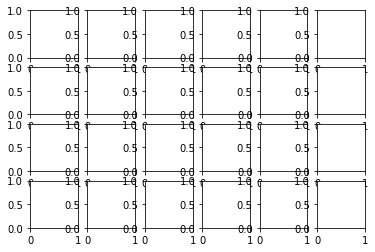

In [97]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, bc.target, random_state=11)

In [100]:
X_train.shape

(426, 30)

In [101]:
X_test.shape

(143, 30)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [103]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [104]:
predicted = knn.predict(X=X_test)

In [105]:
expected = y_test

In [106]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [107]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [108]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [109]:
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

94.41%


In [110]:
wrong = []

In [111]:
for p, e in zip(predicted, expected):
  if p != e:
    wrong.append((p, e))

In [112]:
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [113]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [116]:
from sklearn.metrics import classification_report
names = [str(bc) for bc in bc.target_names]

In [117]:
print(classification_report(expected, predicted,
                            target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [118]:
confusion_df = pd.DataFrame(confusion, index=range(2), 
                            columns=range(2))
#This function would only accept the value of 2

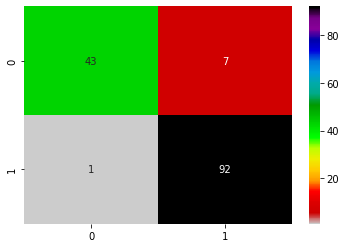

In [119]:
axes = sns.heatmap(confusion_df, annot=True,
                   cmap='nipy_spectral_r')

In [120]:
 kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [121]:
scores = cross_val_score(estimator=knn, X=bc.data, 
          y=bc.target, cv=kfold)

In [122]:
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [123]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


In [124]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.01%


In [125]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC' : SVC(gamma='scale'),
    'GaussianNB' : GaussianNB()
}

In [126]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                           X=bc.data, y=bc.target, cv=kfold)
  print(f'{estimator_name:>20}:' +
        f'mean accuracy ={scores.mean():.2%}' +
        f'standardd deviation={scores.std():.2%}')

KNeighborsClassifier:mean accuracy =92.79%standardd deviation=2.01%
                 SVC:mean accuracy =91.92%standardd deviation=3.52%
          GaussianNB:mean accuracy =93.85%standardd deviation=2.75%


#I was not able to get the last bit you put in the assignment to run properly, so I used the examples in the book. I would appreciate feedback so I know what I did wrong. Thank you!